# Perdiction of sales

### Problem Statement
This dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
| ------------- |-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

---------------------

### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_graphviz 
import graphviz

import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
# from sklearn import linear_model
# from sklearn.linear_model import Ridge
# from sklearn.metrics import r2_score
# from sklearn.linear_model import LinearRegression

In [2]:
import xgboost as xgb

In [3]:
data = pd.read_csv('C:/Users/silvh/OneDrive/lighthouse/W03/2022-10-05-data_preparation_exercise/prepared_data.csv')
print(data.shape)
data

(8523, 22)


,Unnamed: 0,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator,...,Outlet_Location_Type_number,Outlet_Type_number,fatContentCorrected_number,Item_Visibility_quantiles_4,Item_MRP_quantiles_4,storeAge_group_n3,Units_Sold,Drinks,Food,Non-Consumables
0,0,15,13.426069,0.016047,249.8092,49,1999,3735.1380,0,0,...,1,1,1,1,4,2,14.951963,0,1,0
1,1,1,11.847460,0.019278,48.2692,18,2009,443.4228,0,0,...,3,2,2,1,1,1,9.186454,1,0,0
2,2,15,12.817344,0.016760,141.6180,49,1999,2097.2700,0,0,...,1,1,1,1,2,2,14.809346,0,1,0
3,3,7,13.224769,0.000000,182.0950,10,1998,732.3800,1,0,...,3,0,2,0,3,2,4.021967,0,1,0
4,4,19,13.384736,0.000000,53.8614,13,1987,994.7052,0,0,...,3,1,0,0,1,3,18.467868,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,22,12.987880,0.056783,214.5218,13,1987,2778.3834,0,0,...,3,1,1,2,4,3,12.951520,0,1,0
8519,8519,36,12.277108,0.046982,108.1570,45,2002,549.2850,1,0,...,2,1,2,2,2,2,5.078589,0,1,0
8520,8520,29,13.142314,0.035186,85.1224,35,2004,1193.1136,0,0,...,2,1,0,2,1,1,14.016447,0,0,1
8521,8521,46,12.987880,0.145221,103.1332,18,2009,1845.5976,0,0,...,3,2,2,4,2,1,17.895281,0,1,0


In [4]:
# Target variable
y = data['Item_Outlet_Sales']

# Get desired features; some features are not desired for the model
features = list(set(data.columns.to_list()[1:])-set(['Item_Outlet_Sales',
    'Outlet_Establishment_Year','Outlet_Identifier', 'Item_Identifier',
    'Item_Weight_missing_indicator', 'Outlet_Size_missing_indicator','Units_Sold'
    ]))
print('Number of features included: ',len(features))
X = data[features]

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.head()

Number of features included:  14


,Item_Visibility_quantiles_4,Outlet_Location_Type_number,Outlet_Type_number,Item_Visibility,Drinks,Item_Weight,Item_MRP_quantiles_4,storeAge_group_n3,Outlet_Size_number,fatContentCorrected_number,Item_MRP,storeAge,Non-Consumables,Food
1945,3,3,2,0.089345,0,13.384736,4,1,2,0,191.9504,13,1,0
1720,4,3,2,0.168065,0,13.384736,3,1,2,0,176.2712,13,1,0
1954,2,2,1,0.053887,0,13.224769,4,1,0,2,225.6088,15,0,1
1919,4,3,2,0.162904,0,12.987880,2,1,2,1,104.9622,13,0,1
2461,3,2,1,0.059717,0,13.224769,2,1,1,2,130.9968,18,0,1


In [5]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6818, 14)
(6818,)
(1705, 14)
(1705,)


In [6]:
# Check that each column of X_train data got scaled to itself
pd.DataFrame(X_train, columns=features)

,Item_Visibility_quantiles_4,Outlet_Location_Type_number,Outlet_Type_number,Item_Visibility,Drinks,Item_Weight,Item_MRP_quantiles_4,storeAge_group_n3,Outlet_Size_number,fatContentCorrected_number,Item_MRP,storeAge,Non-Consumables,Food
0,0.75,1.0,0.666667,0.272069,0.0,0.813055,1.000000,0.0,0.666667,0.0,0.681925,0.000000,1.0,0.0
1,1.00,1.0,0.666667,0.511783,0.0,0.813055,0.666667,0.0,0.666667,0.0,0.615374,0.000000,1.0,0.0
2,0.50,0.5,0.333333,0.164095,0.0,0.749231,1.000000,0.0,0.000000,1.0,0.824788,0.083333,0.0,1.0
3,1.00,1.0,0.666667,0.496066,0.0,0.654715,0.333333,0.0,0.666667,0.5,0.312702,0.000000,0.0,1.0
4,0.75,0.5,0.333333,0.181846,0.0,0.749231,0.333333,0.0,0.333333,1.0,0.423207,0.208333,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1.00,0.0,0.000000,0.844906,0.0,0.586673,0.666667,1.0,0.333333,1.0,0.531008,1.000000,0.0,1.0
6814,1.00,0.0,0.000000,0.542624,0.0,0.829547,0.000000,1.0,0.333333,0.5,0.100619,1.000000,0.0,1.0
6815,0.75,0.0,0.333333,0.200402,0.0,0.606510,0.666667,1.0,0.333333,0.5,0.500067,0.500000,0.0,1.0
6816,0.50,1.0,0.000000,0.151094,0.0,0.813055,0.000000,0.5,0.000000,0.0,0.054833,0.458333,1.0,0.0


We have covered how to prepare a dataset and the process of feature engineering two weeks ago. In addition, we have already created Lasso and Ridge regressions on Monday. Today, we will be working with the ensemble methods. 

-------------------------
### Model Building: Ensemble Models

Try out the different ensemble models (Random Forest Regressor, Gradient Boosting, XGBoost)
- **Note:** Spend some time on the documention for each of these models.
- **Note:** As you spend time on this challenge, it is suggested to review how each of these models work and how they compare to each other.

Calculate the **mean squared error** on the test set. Explore how different parameters of the model affect the results and the performance of the model. (*Stretch: Create a visualization to display this information*)

- Use GridSearchCV to find optimal paramaters of models.
- Compare agains the Lasso and Ridge Regression models from Monday.

**Questions to answer:**
- Which ensemble model performed the best? 

In [7]:
# Define a function
def get_best_model(estimator, param_grid, X_train, y_train, X_test, y_test, model_name='model'):
    """
    - Perform grid search.
    - Use the model to predict.
    - Print the mean squared error.
    - Print the best model parameters from the grid search.

    Paramters:
    - model_name (string): Name of the model to include when printing results.
    - estimator : Estimator object.
    """
    grid = GridSearchCV(estimator=estimator, param_grid=param_grid)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}\tMeansquared error: {MSE}\tR^2: {r2}')
    print(f'Best model parameters from grid search: {grid.best_params_}')
    return best_model


### *Random Forest*

In [8]:
params_forest = {
    'n_estimators': np.arange(50,150,25),
    'random_state': [1],
    # 'max_depth': np.arange(2,8,2)
}
rf = RandomForestRegressor()

get_best_model(rf, params_forest, X_train, y_train, X_test, y_test, model_name='Random forest')

Model: Random forest	Meansquared error: 1323961.5278237124	R^2: 0.553367292100357
Best model parameters from grid search: {'n_estimators': 100, 'random_state': 1}


RandomForestRegressor(random_state=1)

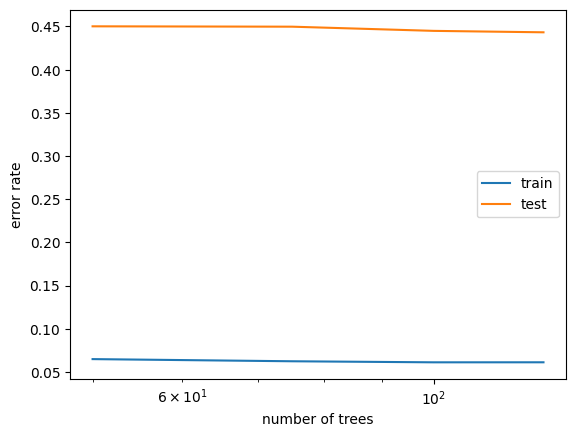

In [9]:
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestRegressor
   
    Parameters
    ----------
    X_train: numpy.ndarray        
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set    
    X_test: numpy.ndarray        
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set    
    num_trees: int
        The value for `n_estimators` argument of RandomForestRegressor
    Returns
    -------
        None
        Shows the number of trees vs error rate plot
            
    """    
    train_err = []
    test_err = []
    for ntree in num_trees:
        model = RandomForestRegressor(n_estimators=ntree)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    fig, ax = plt.subplots()
    ax.plot(num_trees,train_err,label="train")
    ax.plot(num_trees,test_err,label="test")
    ax.set_xlabel('number of trees');
    ax.set_ylabel('error rate');
    ax.set_xscale('log')
    ax.legend()
    plt.show()

#fit a random forest for various n_estimators and plot the error
make_num_tree_plot(X_train, y_train, X_test, y_test, params_forest['n_estimators'])

### *Gradient Boosting*

In [21]:

params_gradient = {
    'learning_rate': np.logspace(-4,-1,4),
    'random_state': [1],
    'n_estimators': np.arange(50,150,25)
}
gb = GradientBoostingRegressor()
# get_best_model(gb, params_forest, X_train, y_train, X_test, y_test, model_name='Gradient boosting')

In [11]:
best_gb = get_best_model(gb, params_forest, X_train, y_train, X_test, y_test, model_name='Gradient boosting')
print('number of features: ',best_gb.n_features_in_)

Model: Gradient boosting	Meansquared error: 1193009.031748279	R^2: 0.597543551530288
Best model parameters from grid search: {'n_estimators': 50, 'random_state': 1}
number of features:  14


In [22]:
best_gb

GradientBoostingRegressor(n_estimators=50, random_state=1)

### *XGBoost*

In [12]:
# instantiate an XGBoost regressor object
xg_reg = xgb.XGBRegressor()

#### *Perform XGBoost with a single set of parameters.*

In [13]:
# Set parameters
alpha = 1
learning_rate = 0.1
colsample_bytree = 0.3

# Convert the dataset (not yet split) into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 
data_dmatrix = xgb.DMatrix(data=X,label=y)

# You will use these parameters to build a 3-fold cross validation model 
params = {'colsample_bytree': colsample_bytree,'learning_rate': learning_rate,
        'alpha': alpha}

# cv_results contains train and test RMSE metrics for each boosting round.
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
        num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

# Train the model
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [14]:
# Extract and print the final boosting round metric.
cv_results["test-rmse-mean"].tail(1)

49    1103.728429
Name: test-rmse-mean, dtype: float64

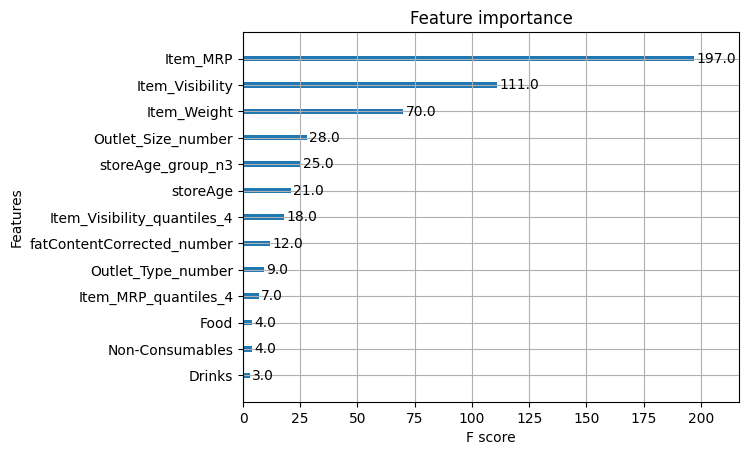

In [15]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

#### *Use Grid Search with XGBoost*

In [16]:
params_xgb = {
    'colsample_bytree': np.arange(0.4,1.2,.2), # [0.4, 0.6, 0.8, 1. ]
    'learning_rate': np.logspace(-2,-.5,4), # [0.01      , 0.03162278, 0.1       , 0.31622777]
    'alpha': np.arange(0,5,1)} # [0, 1, 2, 3, 4]

model_xgb = xgb.XGBRegressor()
best_xgb =get_best_model(model_xgb, params_xgb, X_train, y_train, X_test, y_test, model_name='XGBoost')

Model: XGBoost	Meansquared error: 1216727.7292632707	R^2: 0.5895421512808512
Best model parameters from grid search: {'alpha': 0, 'colsample_bytree': 1.0000000000000002, 'learning_rate': 0.03162277660168379}


In [17]:
best_xgb

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1.0000000000000002, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03162277660168379,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [18]:
type(best_xgb.get_params())

dict

[12:27:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

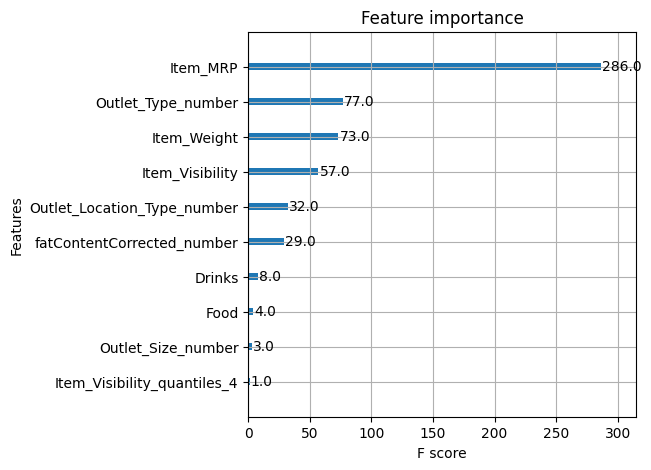

In [19]:
# Train the model using the parameters found from grid search
best_xgb_trained = xgb.train(params=best_xgb.get_params(), dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(best_xgb_trained)



In [20]:
best_xgb_trained.coef_

AttributeError: 'Booster' object has no attribute 'coef_'

In [ ]:
xg_reg.coef_

AttributeError: 'Booster' object has no attribute 'coef_'

<AxesSubplot: >

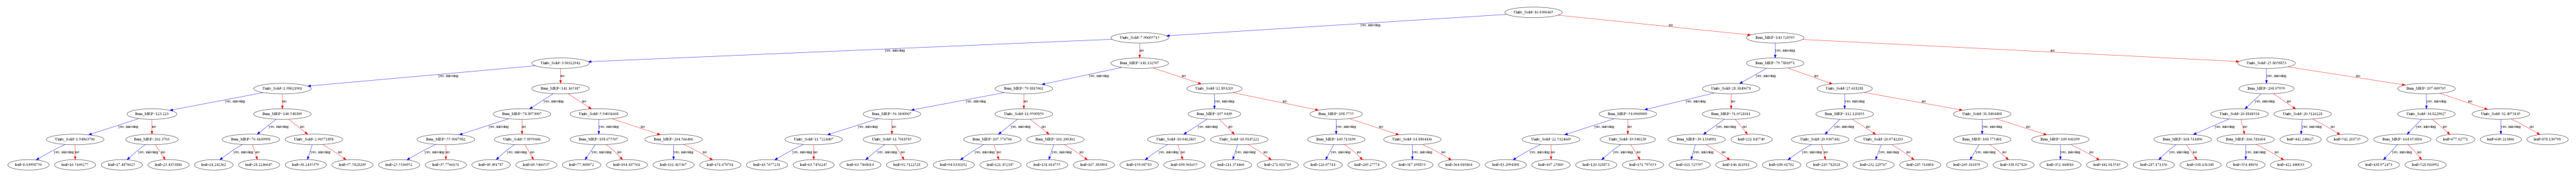

In [ ]:
# Plotting the first tree
xgb.plot_tree(best_xgb_trained,num_trees=0)

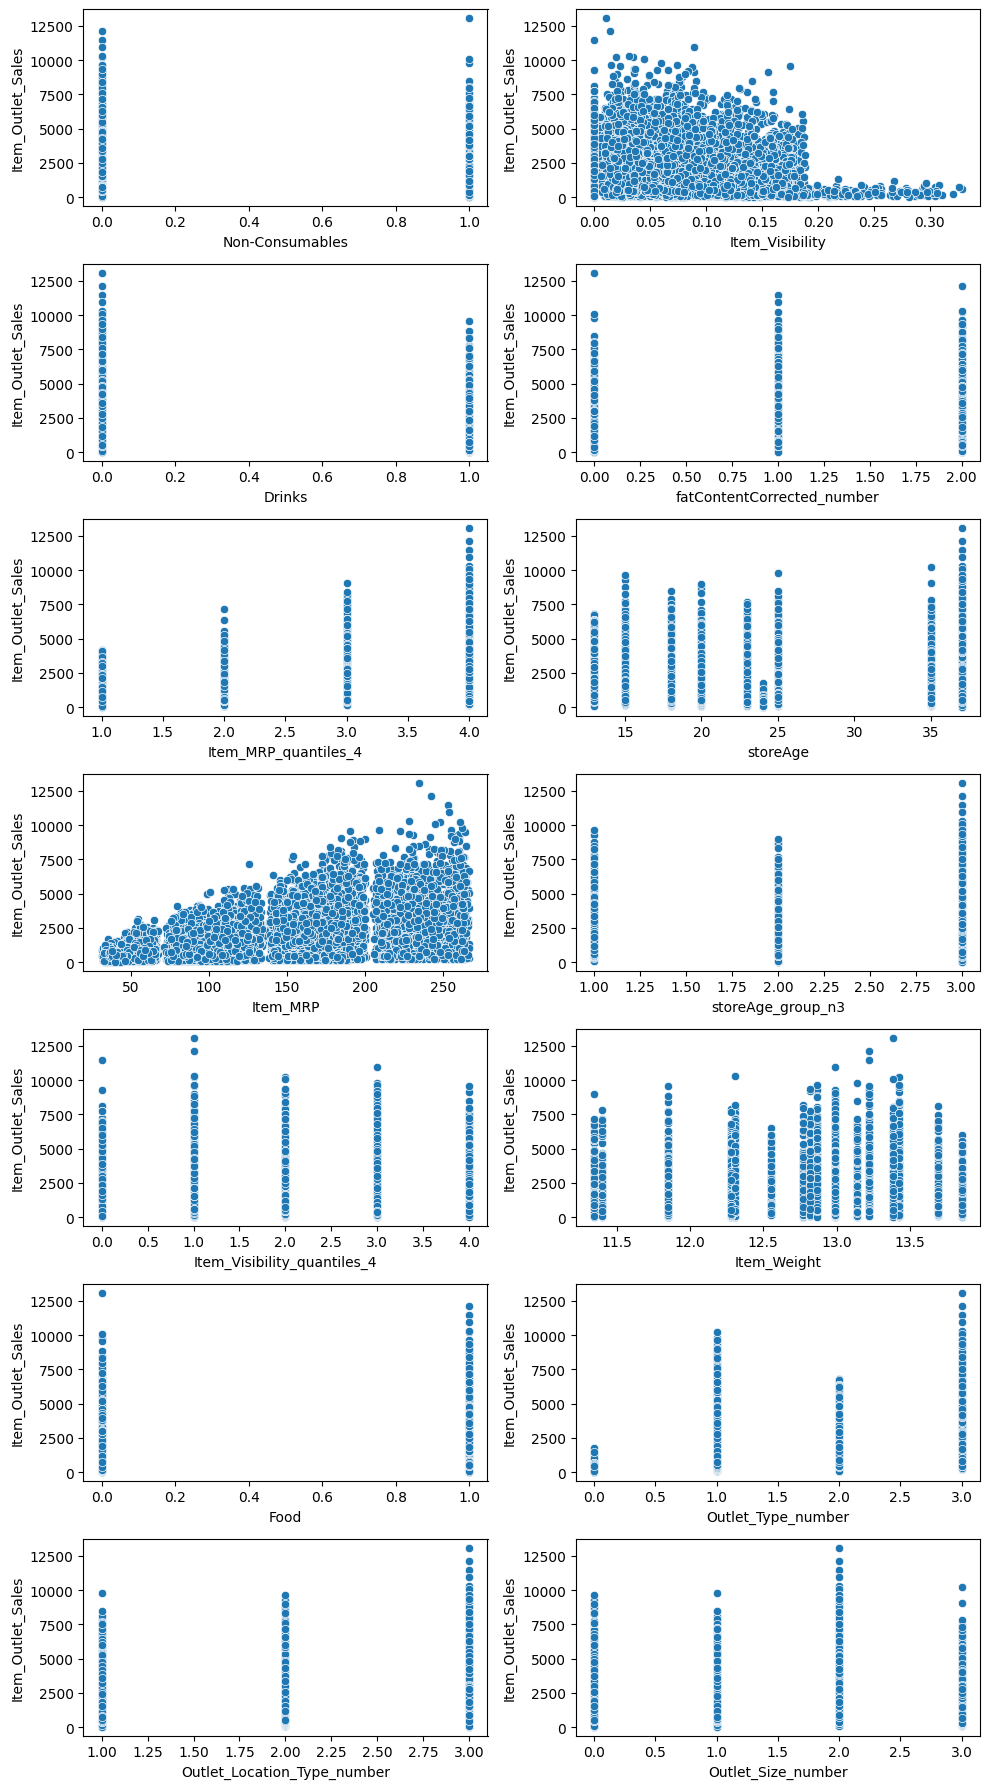

In [ ]:
# Plot unscaled data for each feature against Item Outlet Sales to see if it aligns 
# with XGBoost feature importance rankings
fig, ax = plt.subplots(nrows=round(len(features)/2), ncols=2, figsize=(10,18))
for i, feature in enumerate(features):
    sns.scatterplot(data=data,y='Item_Outlet_Sales',x=feature,ax=ax[i//2, i % 2])
plt.tight_layout()

## *Questions for mentors*:
* How to obtain feature coefficients